In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos
file_path = 'risk_factors_cervical_cancer.csv'
data = pd.read_csv(file_path)

# Mostrar las primeras filas del conjunto de datos
print(data.head())


   Age Number of sexual partners First sexual intercourse Num of pregnancies  \
0   18                       4.0                     15.0                1.0   
1   15                       1.0                     14.0                1.0   
2   34                       1.0                        ?                1.0   
3   52                       5.0                     16.0                4.0   
4   46                       3.0                     21.0                4.0   

  Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives  \
0    0.0            0.0                 0.0                     0.0   
1    0.0            0.0                 0.0                     0.0   
2    0.0            0.0                 0.0                     0.0   
3    1.0           37.0                37.0                     1.0   
4    0.0            0.0                 0.0                     1.0   

  Hormonal Contraceptives (years)  IUD  ... STDs: Time since first diagnosis  \
0           

# ANÁLISIS EXPLORATORIO DATOS

In [15]:
# Identificar tipos de variables
for column in data.columns:
    print(f'{column}: {data[column].dtype}')


Age: int64
Number of sexual partners: object
First sexual intercourse: object
Num of pregnancies: object
Smokes: object
Smokes (years): object
Smokes (packs/year): object
Hormonal Contraceptives: object
Hormonal Contraceptives (years): object
IUD: object
IUD (years): object
STDs: object
STDs (number): object
STDs:condylomatosis: object
STDs:cervical condylomatosis: object
STDs:vaginal condylomatosis: object
STDs:vulvo-perineal condylomatosis: object
STDs:syphilis: object
STDs:pelvic inflammatory disease: object
STDs:genital herpes: object
STDs:molluscum contagiosum: object
STDs:AIDS: object
STDs:HIV: object
STDs:Hepatitis B: object
STDs:HPV: object
STDs: Number of diagnosis: int64
STDs: Time since first diagnosis: object
STDs: Time since last diagnosis: object
Dx:Cancer: int64
Dx:CIN: int64
Dx:HPV: int64
Dx: int64
Hinselmann: int64
Schiller: int64
Citology: int64
Biopsy: int64


# Exploración de variables cuantitativas

              Age  Number of sexual partners  First sexual intercourse  \
count  858.000000                 832.000000                851.000000   
mean    26.820513                   2.527644                 16.995300   
std      8.497948                   1.667760                  2.803355   
min     13.000000                   1.000000                 10.000000   
25%     20.000000                   2.000000                 15.000000   
50%     25.000000                   2.000000                 17.000000   
75%     32.000000                   3.000000                 18.000000   
max     84.000000                  28.000000                 32.000000   

       Num of pregnancies      Smokes  Smokes (years)  Smokes (packs/year)  \
count          802.000000  845.000000      845.000000           845.000000   
mean             2.275561    0.145562        1.219721             0.453144   
std              1.447414    0.352876        4.089017             2.226610   
min              0.00

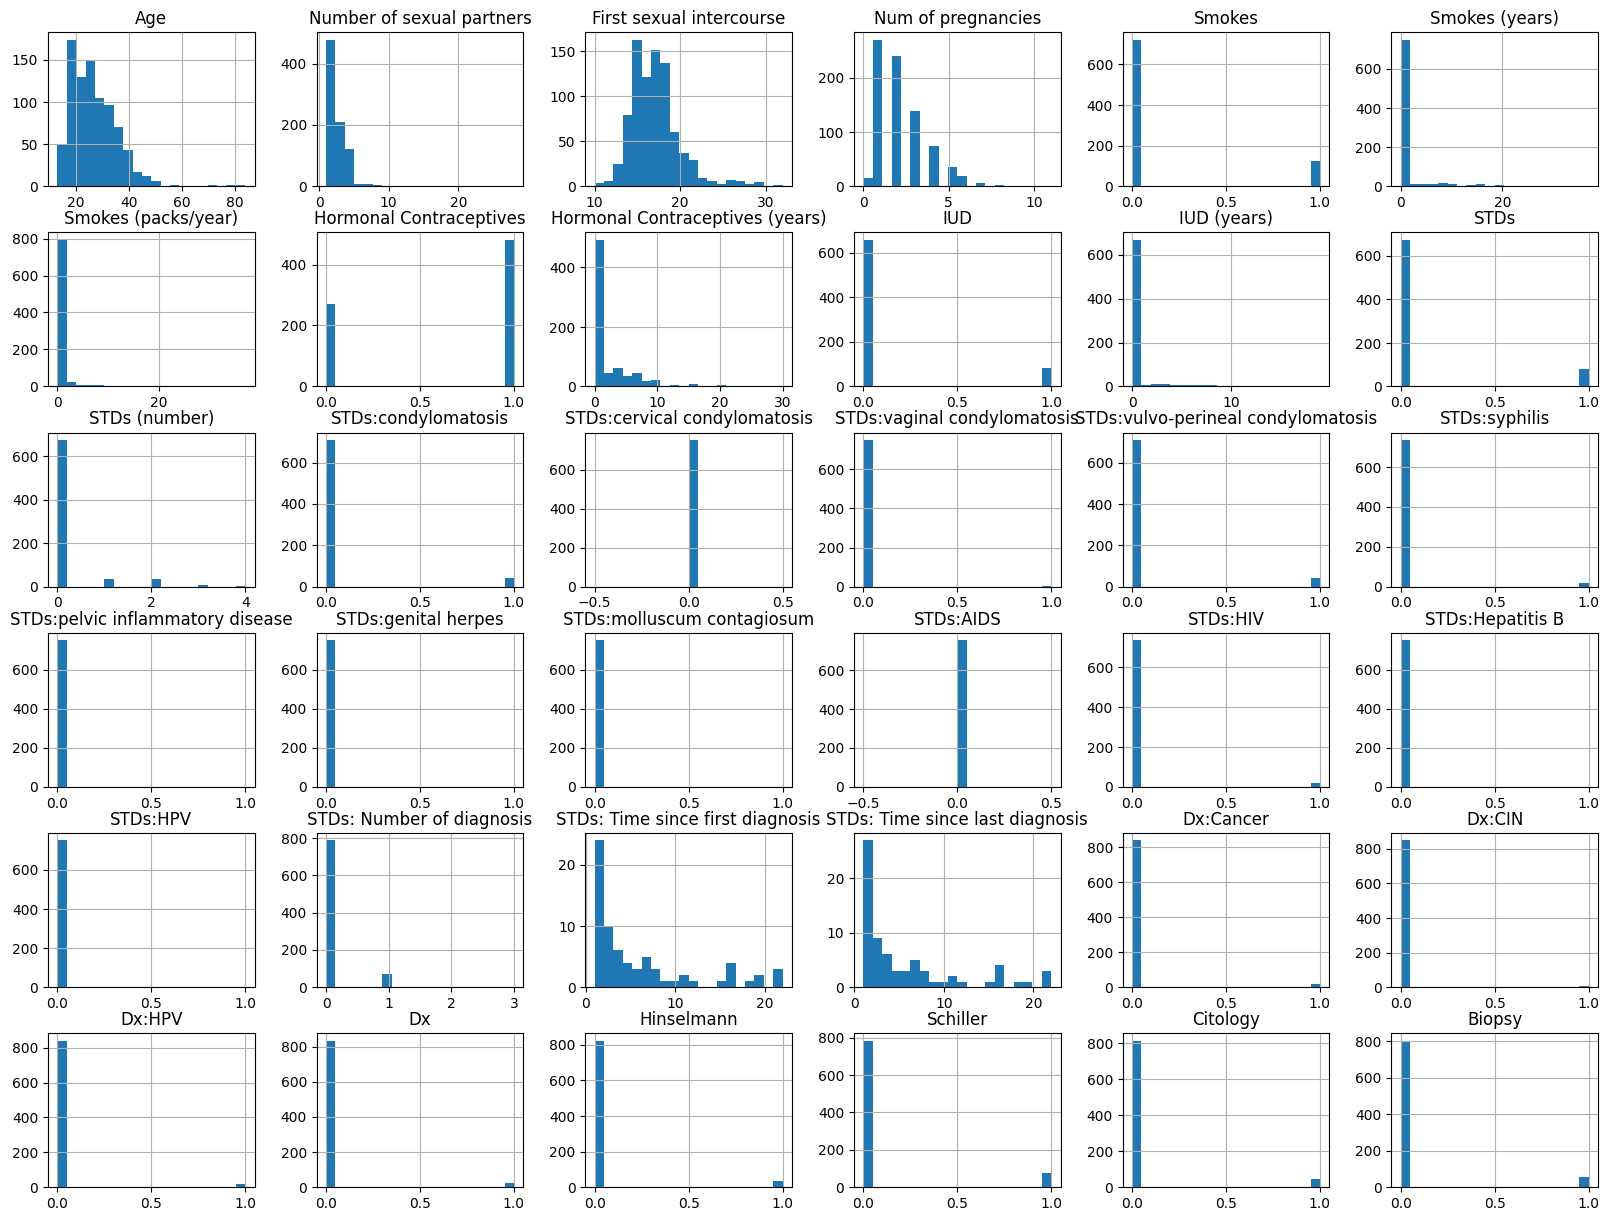

In [16]:
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Resumen estadístico
print(data.describe())

# Histogramas para variables cuantitativas
data.hist(bins=20, figsize=(20, 15))
plt.show()


Gráficos de cajas y bigotes


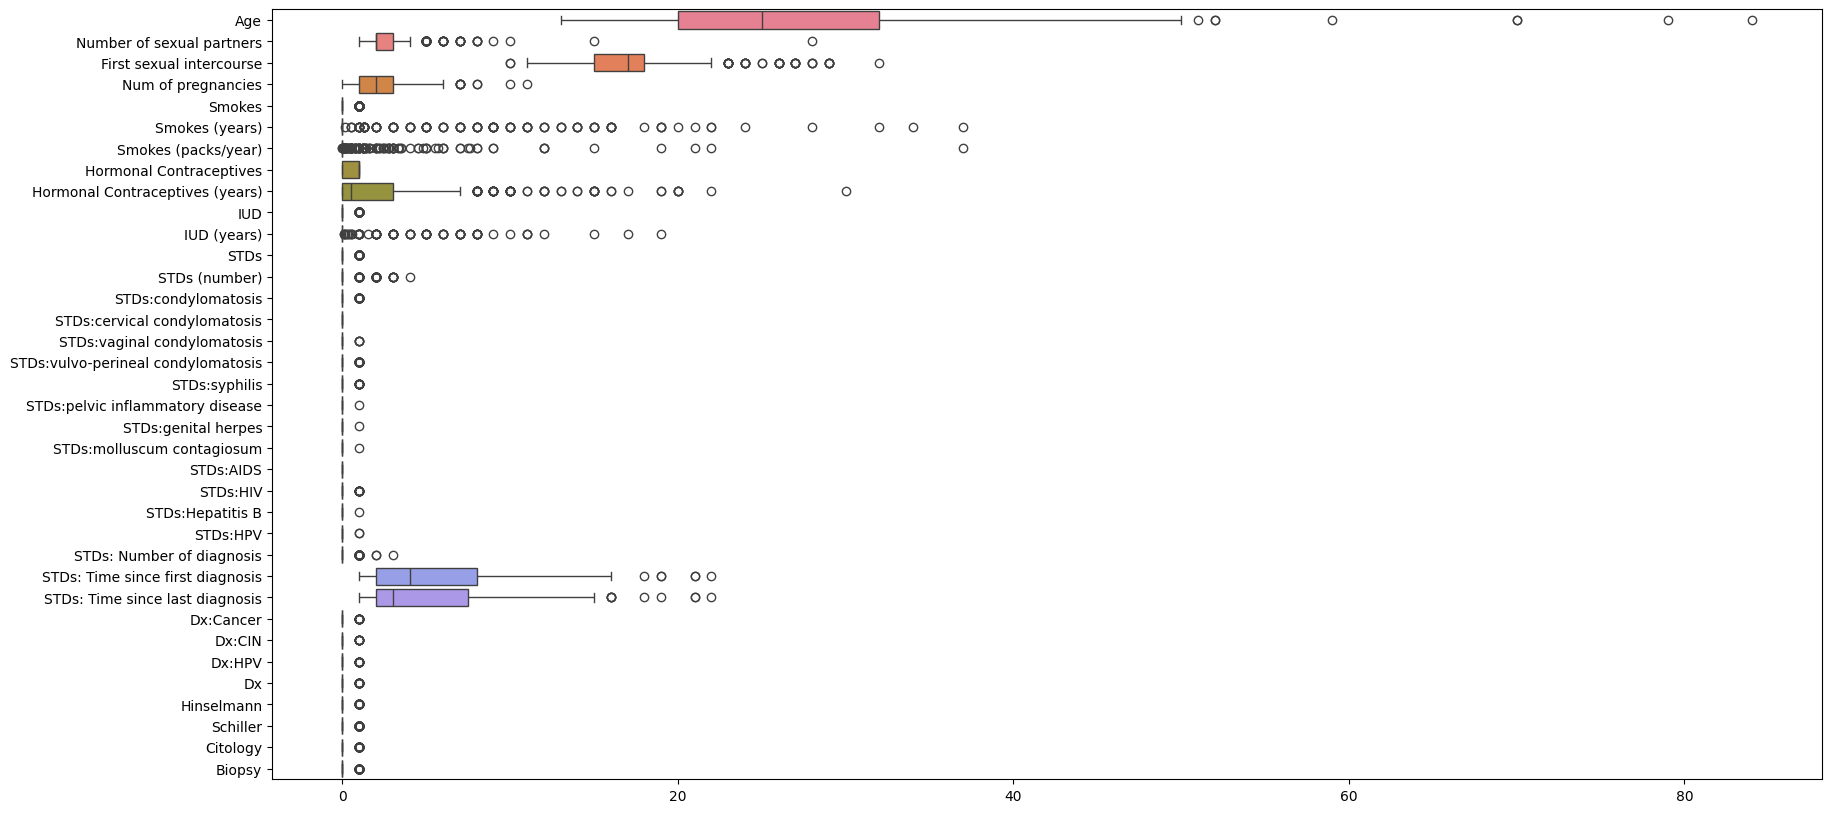

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'risk_factors_cervical_cancer.csv'
data = pd.read_csv(file_path)


data = data.replace('?', pd.NA)
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Diagramas de cajas y bigotes
plt.figure(figsize=(20, 10))
sns.boxplot(data=data, orient="h")
plt.show()


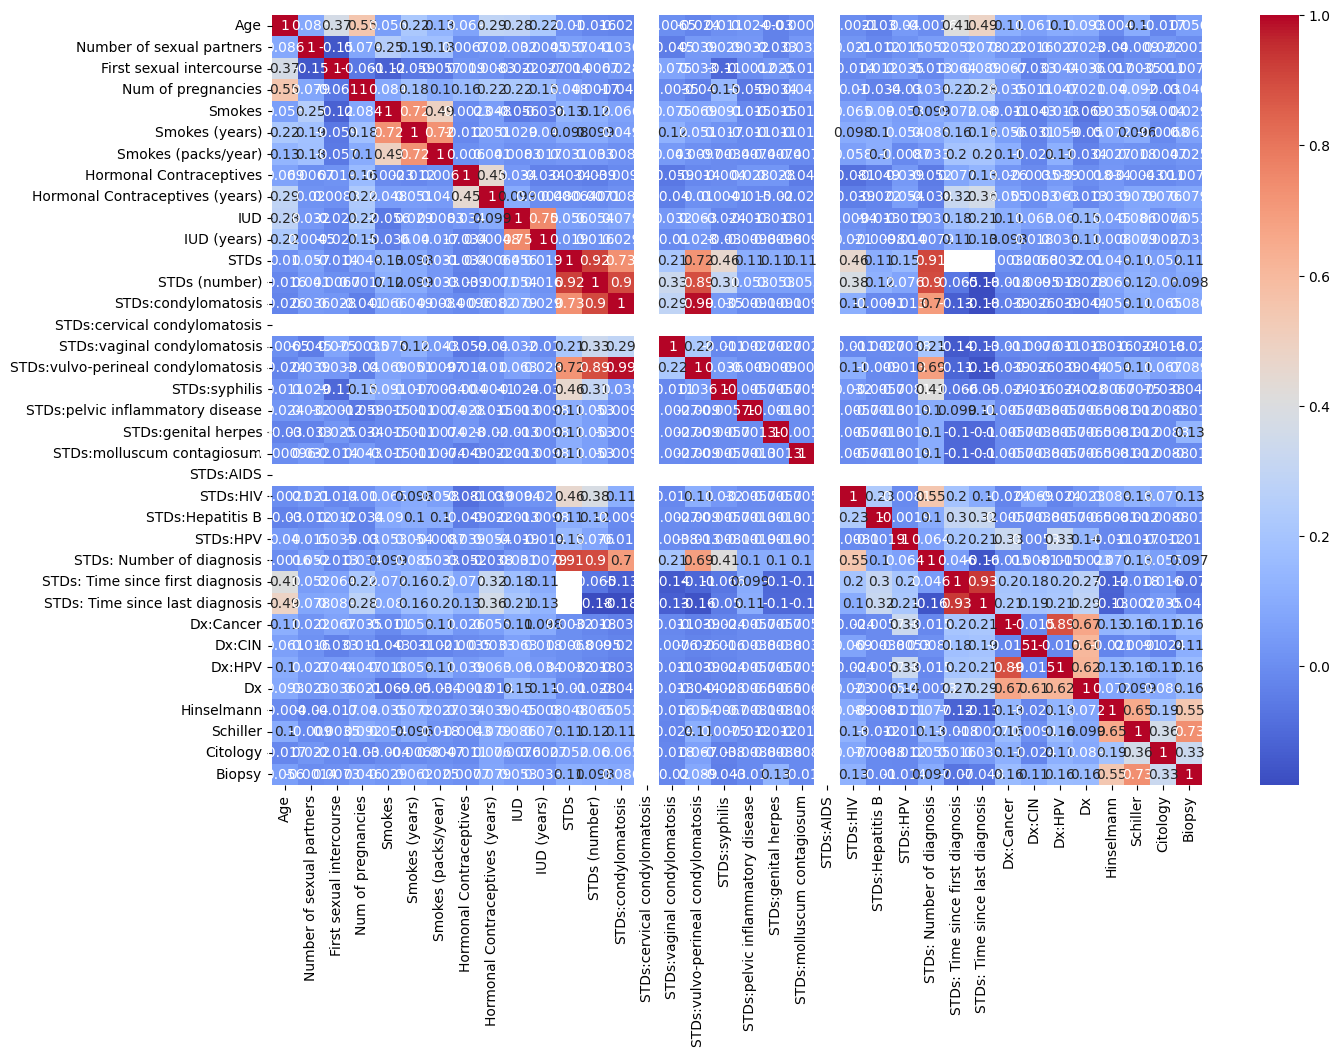

In [18]:
# Matriz de correlación
corr_matrix = data.corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


Tablas de frecuencia y gráficos de variables categóricas:

In [33]:

categorical_cols = [col for col in data.columns if data[col].dtype == 'object']

for col in categorical_cols:
    print(data[col].value_counts())

    plt.figure(figsize=(10, 5))
    sns.countplot(data[col])
    plt.title(col)
    plt.show()



valores faltantes


In [20]:
# Contar valores faltantes
missing_values = data.isnull().sum()

# Eliminar variables con demasiados valores faltantes
threshold = 0.3
data_cleaned = data.loc[:, missing_values / len(data) < threshold]


for col in data_cleaned.columns:
    if data_cleaned[col].dtype == 'object':
        data_cleaned[col].fillna(data_cleaned[col].mode()[0], inplace=True)
    else:
        data_cleaned[col].fillna(data_cleaned[col].median(), inplace=True)

print(data_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           858 non-null    float64
 2   First sexual intercourse            858 non-null    float64
 3   Num of pregnancies                  858 non-null    float64
 4   Smokes                              858 non-null    float64
 5   Smokes (years)                      858 non-null    float64
 6   Smokes (packs/year)                 858 non-null    float64
 7   Hormonal Contraceptives             858 non-null    float64
 8   Hormonal Contraceptives (years)     858 non-null    float64
 9   IUD                                 858 non-null    float64
 10  IUD (years)                         858 non-null    float64
 11  STDs                                858 non-n

C:\Users\inmar\AppData\Local\Temp\ipykernel_25152\3282005162.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col].fillna(data_cleaned[col].median(), inplace=True)
C:\Users\inmar\AppData\Local\Temp\ipykernel_25152\3282005162.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col].fillna(data_cleaned[col].median(), inplace=True)
C:\Users\inmar\AppData\Local\Temp\ipykernel_25152\3282005162.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

# 2. Diga el tipo de cada una de las variables del conjunto de datos (cualitativa o categórica, cuantitativacontinua, cuantitativa discreta)

### Determinación del tipo de cada variable en el conjunto de datos

#### Cuantitativa Continua
- Age
- Smokes (years)
- Smokes (packs/year)
- Hormonal Contraceptives (years)
- IUD (years)
- STDs: Time since first diagnosis
- STDs: Time since last diagnosis

#### Cuantitativa Discreta
- Number of sexual partners
- First sexual intercourse
- Num of pregnancies
- STDs (number)
- STDs: Number of diagnosis

#### Cualitativa (Categórica)
- Smokes
- Hormonal Contraceptives
- IUD
- STDs
- STDs:condylomatosis
- STDs:cervical condylomatosis
- STDs:vaginal condylomatosis
- STDs:vulvo-perineal condylomatosis
- STDs:syphilis
- STDs:pelvic inflammatory disease
- STDs:genital herpes
- STDs:molluscum contagiosum
- STDs:AIDS
- STDs:HIV
- STDs:Hepatitis B
- STDs:HPV
- Dx:Cancer
- Dx:CIN
- Dx:HPV
- Dx
- Hinselmann
- Schiller
- Citology
- Biopsy


# incluya los gráficos exploratorios siendo consecuentes con el tipo de variable que están representando

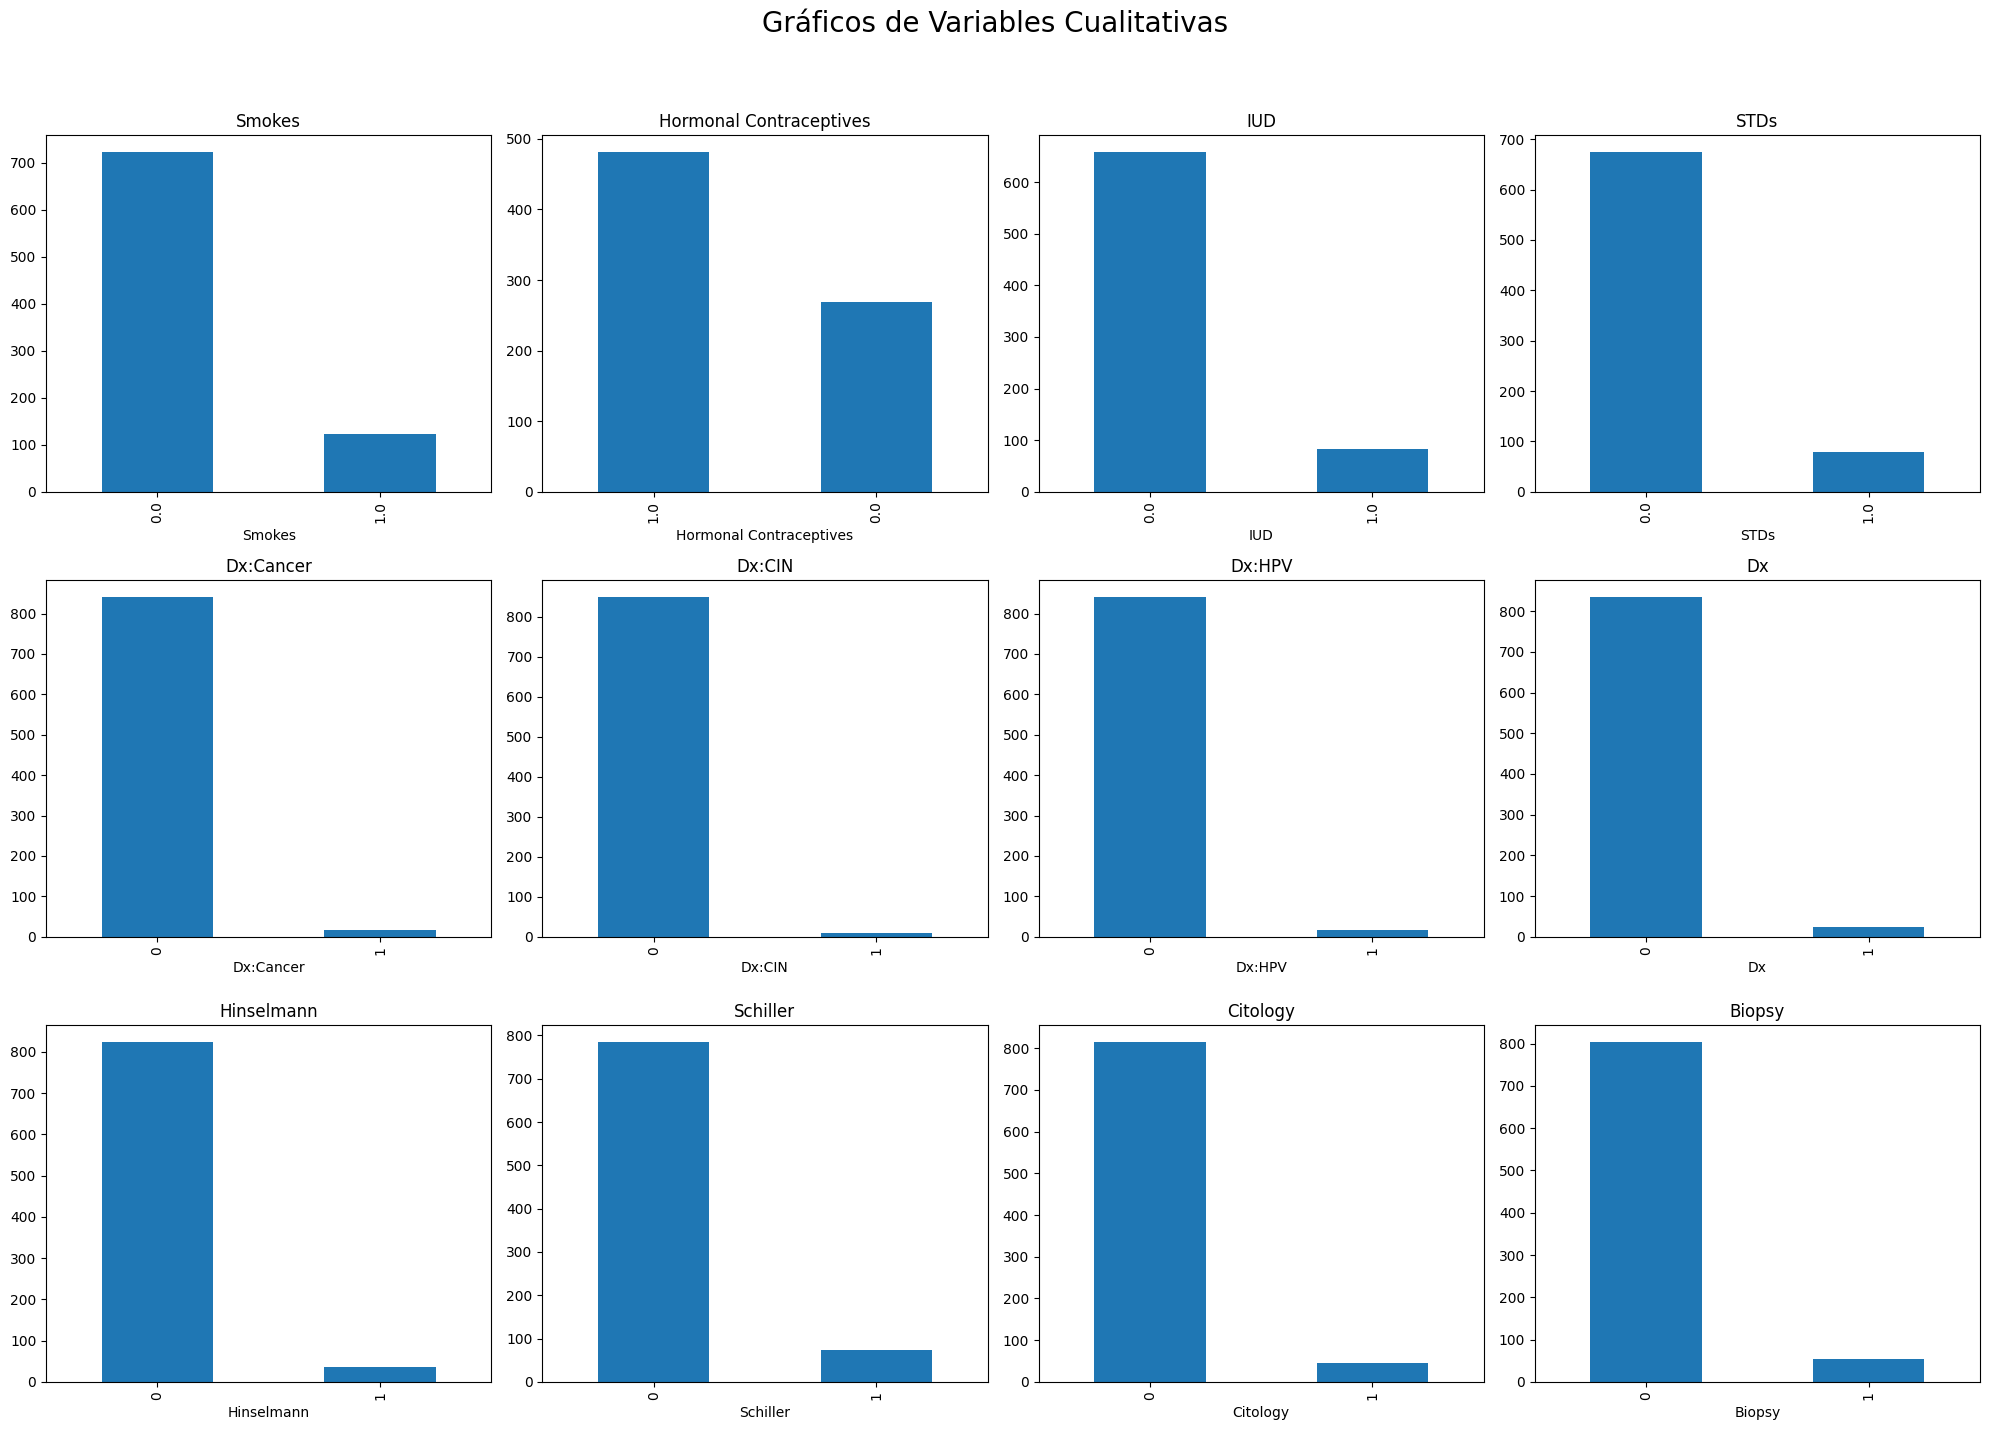

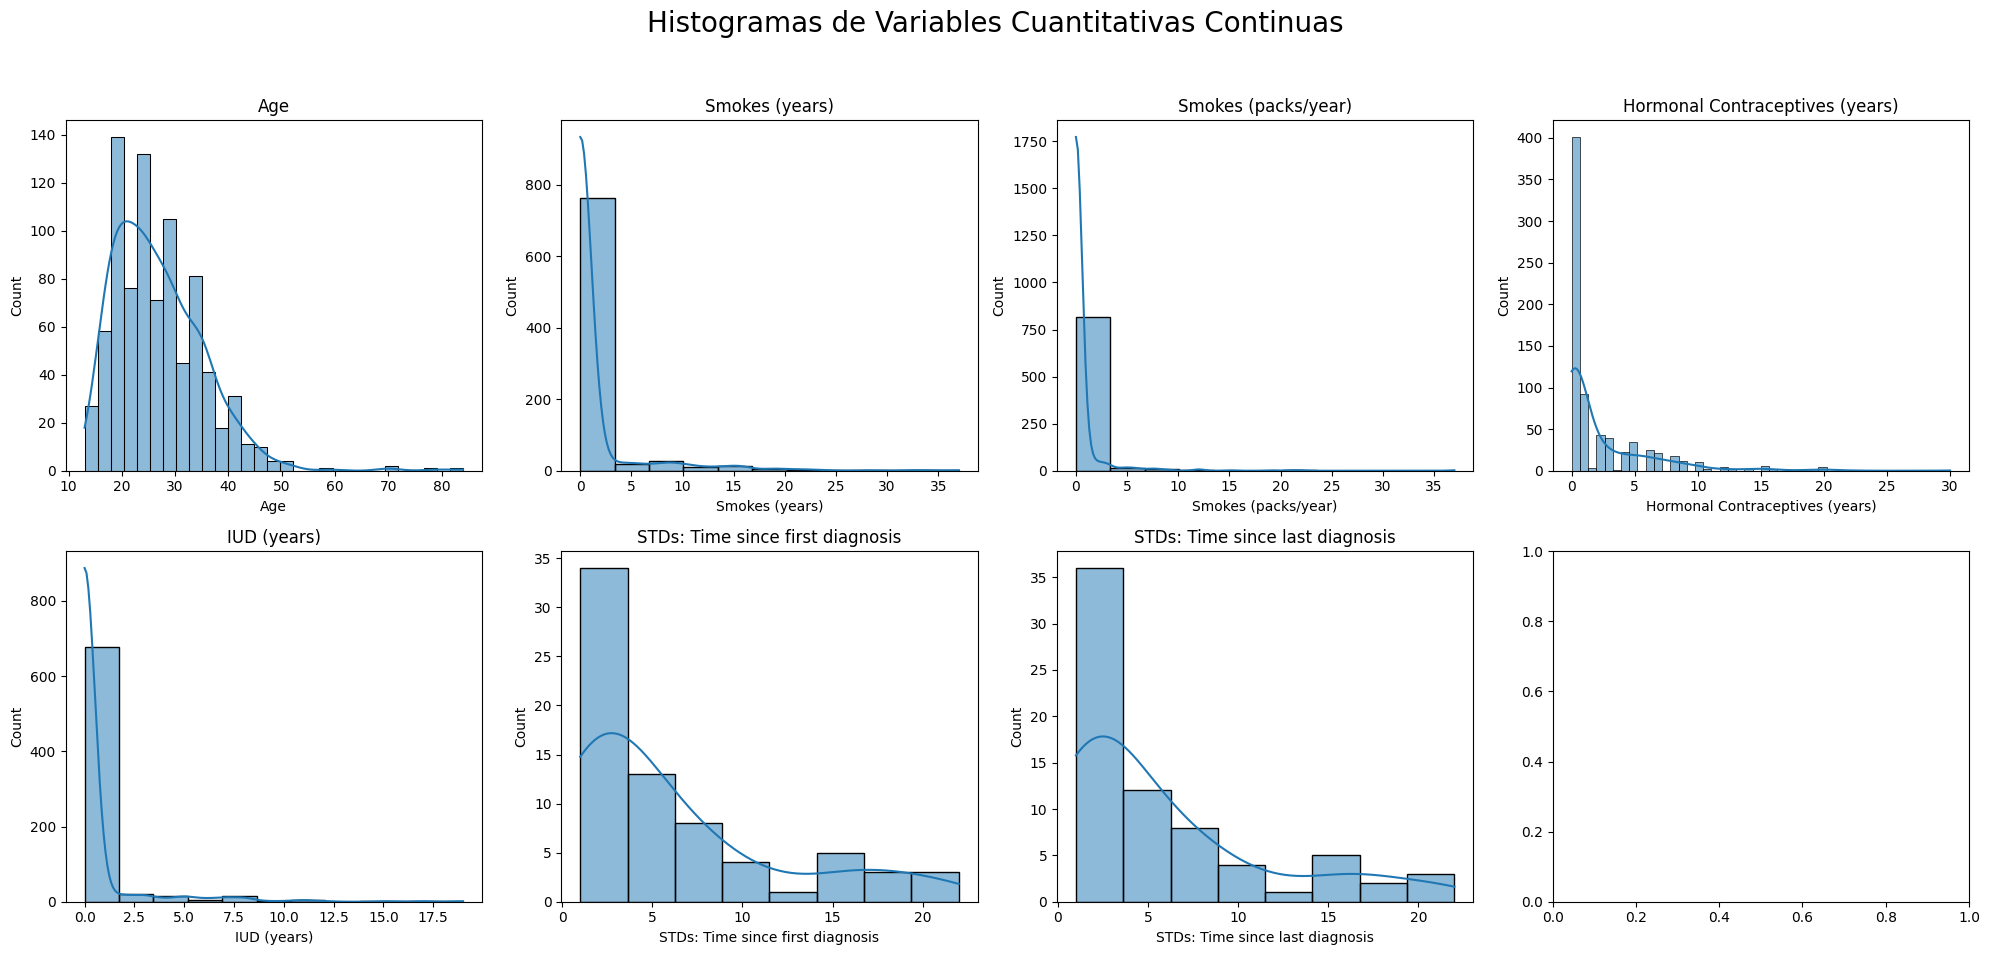

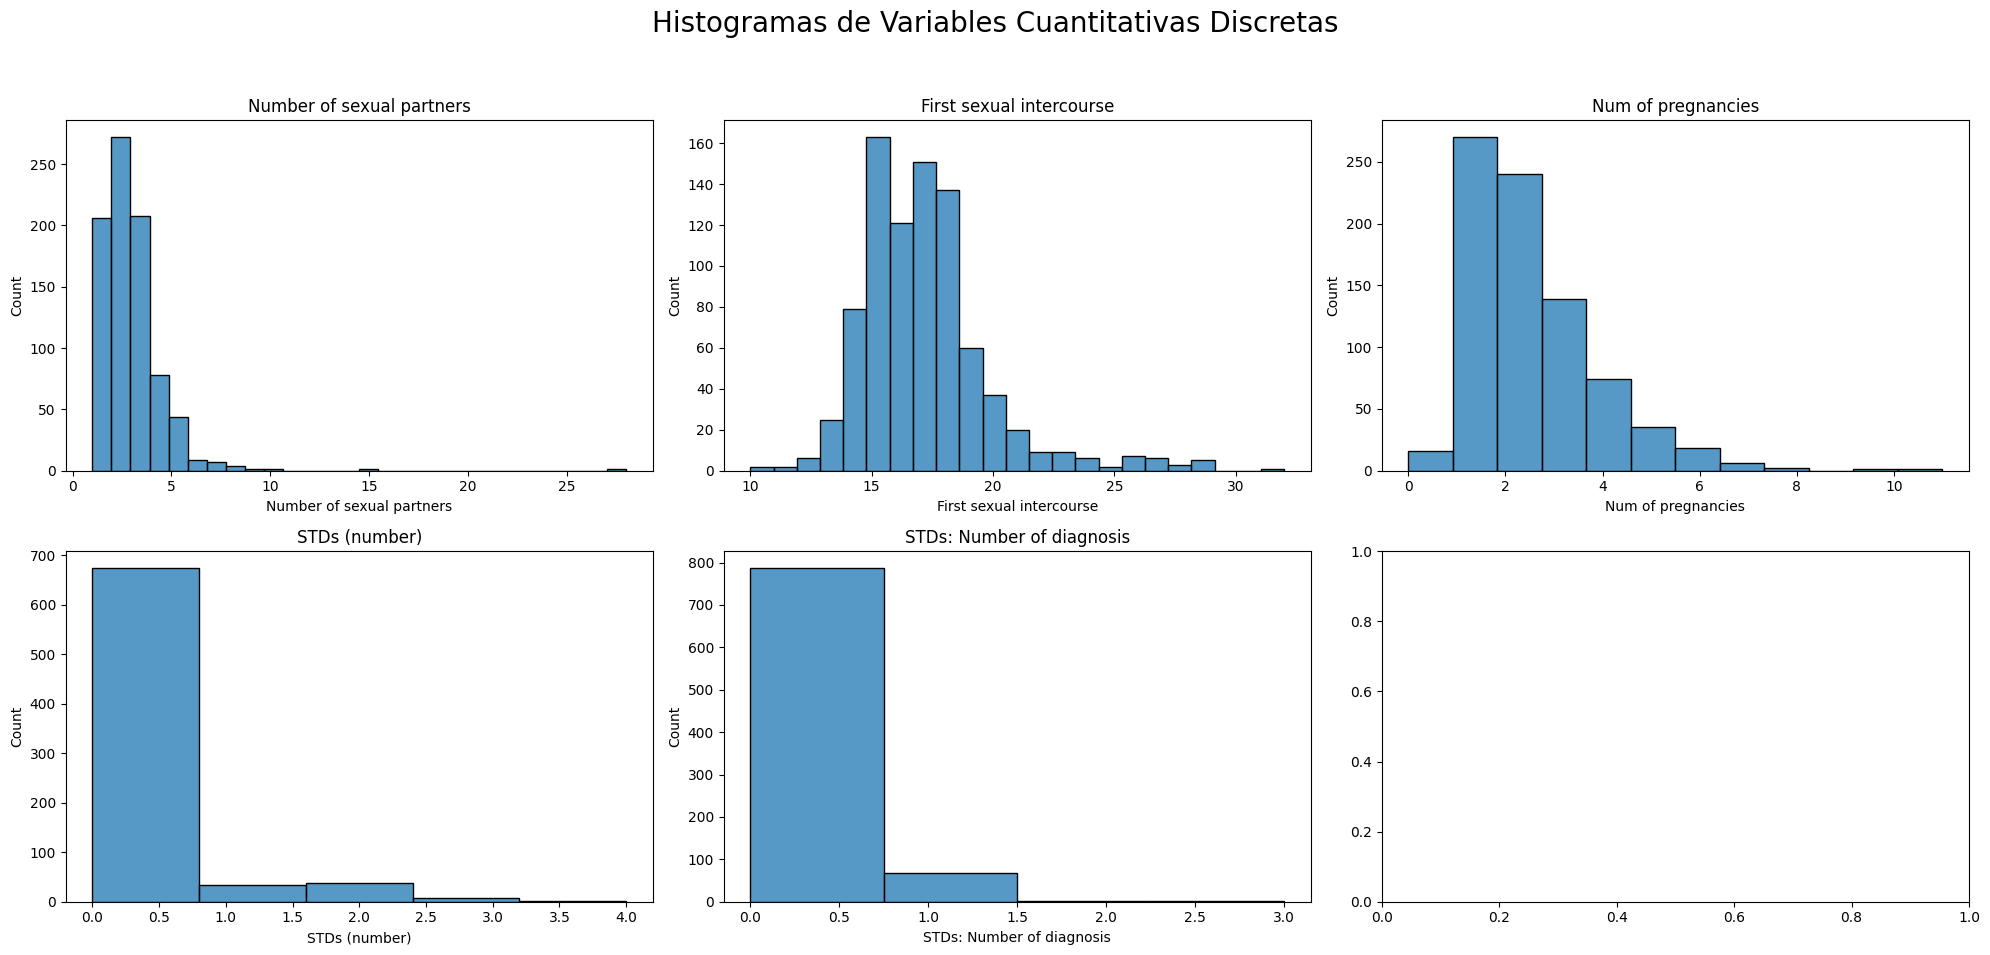

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = 'risk_factors_cervical_cancer.csv'
data = pd.read_csv(file_path)

# Reemplazar '?' por NaN y convertir a tipo numérico
data = data.replace('?', pd.NA)
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Identificar variables cualitativas y cuantitativas
qualitative_vars = [
    'Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'Dx:Cancer', 'Dx:CIN',
    'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy'
]

quantitative_vars_cont = [
    'Age', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)',
    'IUD (years)', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'
]

quantitative_vars_disc = [
    'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies',
    'STDs (number)', 'STDs: Number of diagnosis'
]

# Gráficos para variables cualitativas
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
fig.suptitle('Gráficos de Variables Cualitativas', fontsize=20)
for ax, var in zip(axes.flatten(), qualitative_vars):
    data[var].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(var)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Gráficos para variables cuantitativas continuas
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
fig.suptitle('Histogramas de Variables Cuantitativas Continuas', fontsize=20)
for ax, var in zip(axes.flatten(), quantitative_vars_cont):
    sns.histplot(data[var], kde=True, ax=ax)
    ax.set_title(var)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Gráficos para variables cuantitativas discretas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
fig.suptitle('Histogramas de Variables Cuantitativas Discretas', fontsize=20)
for ax, var in zip(axes.flatten(), quantitative_vars_disc):
    sns.histplot(data[var], kde=False, bins=int(data[var].max() - data[var].min() + 1), ax=ax)
    ax.set_title(var)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Aísle las variables numéricas de las categóricas, haga un análisis de correlación entre las mismas

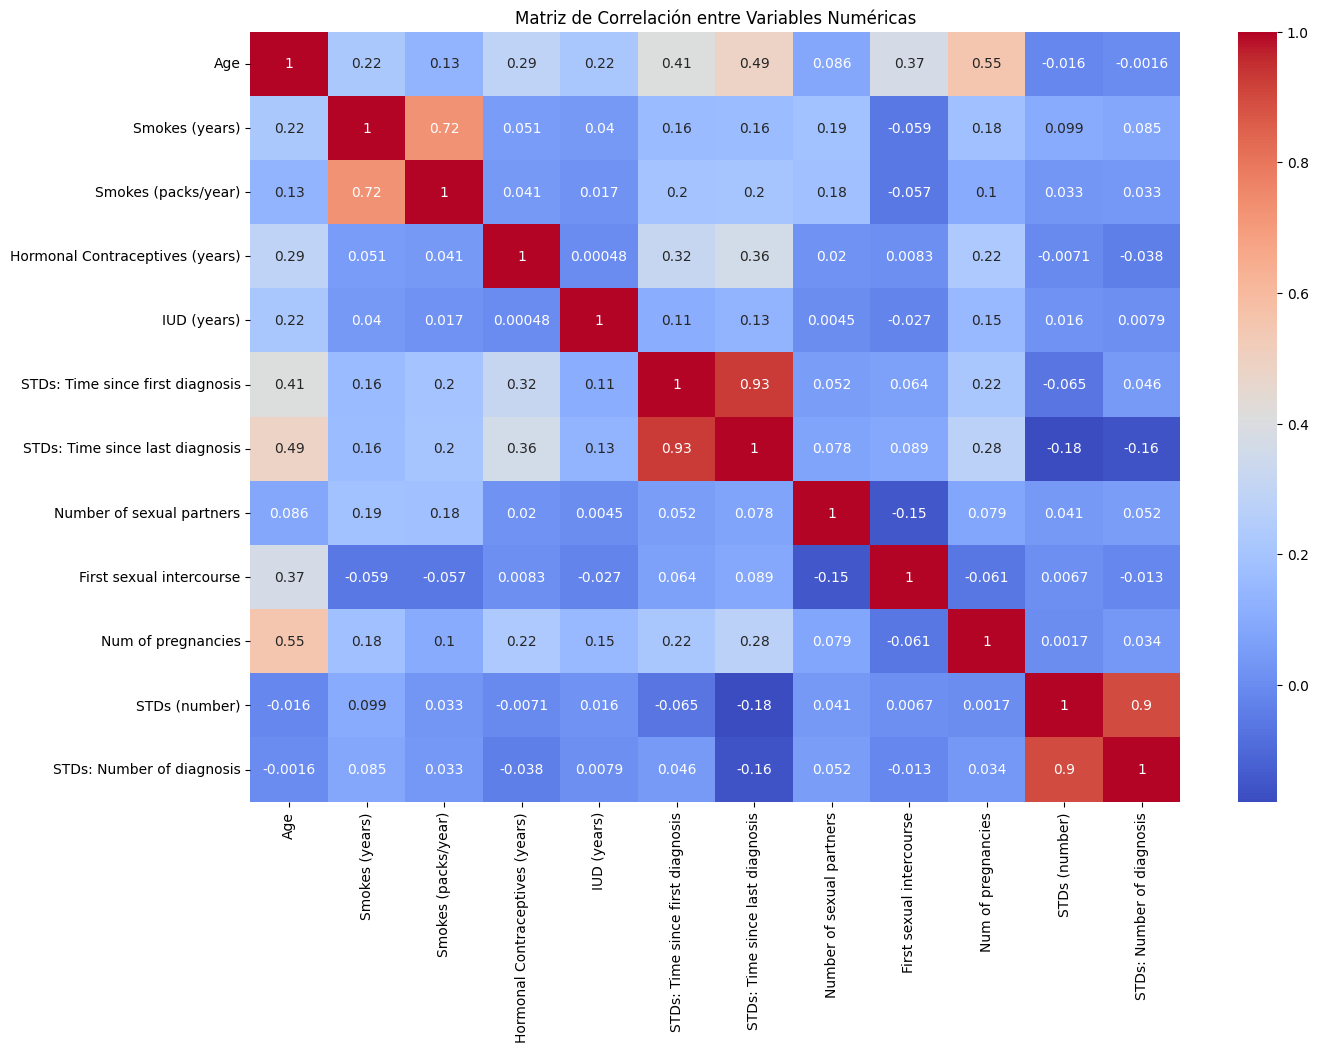

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = 'risk_factors_cervical_cancer.csv'
data = pd.read_csv(file_path)


data = data.replace('?', pd.NA)
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = pd.to_numeric(data[col], errors='coerce')


qualitative_vars = [
    'Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'Dx:Cancer', 'Dx:CIN',
    'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy'
]

quantitative_vars_cont = [
    'Age', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)',
    'IUD (years)', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'
]

quantitative_vars_disc = [
    'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies',
    'STDs (number)', 'STDs: Number of diagnosis'
]


quantitative_vars = quantitative_vars_cont + quantitative_vars_disc


numerical_data = data[quantitative_vars]


correlation_matrix = numerical_data.corr()


plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()


# Utilice las variables categóricas, haga tablas de frecuencia, proporción, gráficas de barras o cualquierotra técnica que le permita explorar los datos

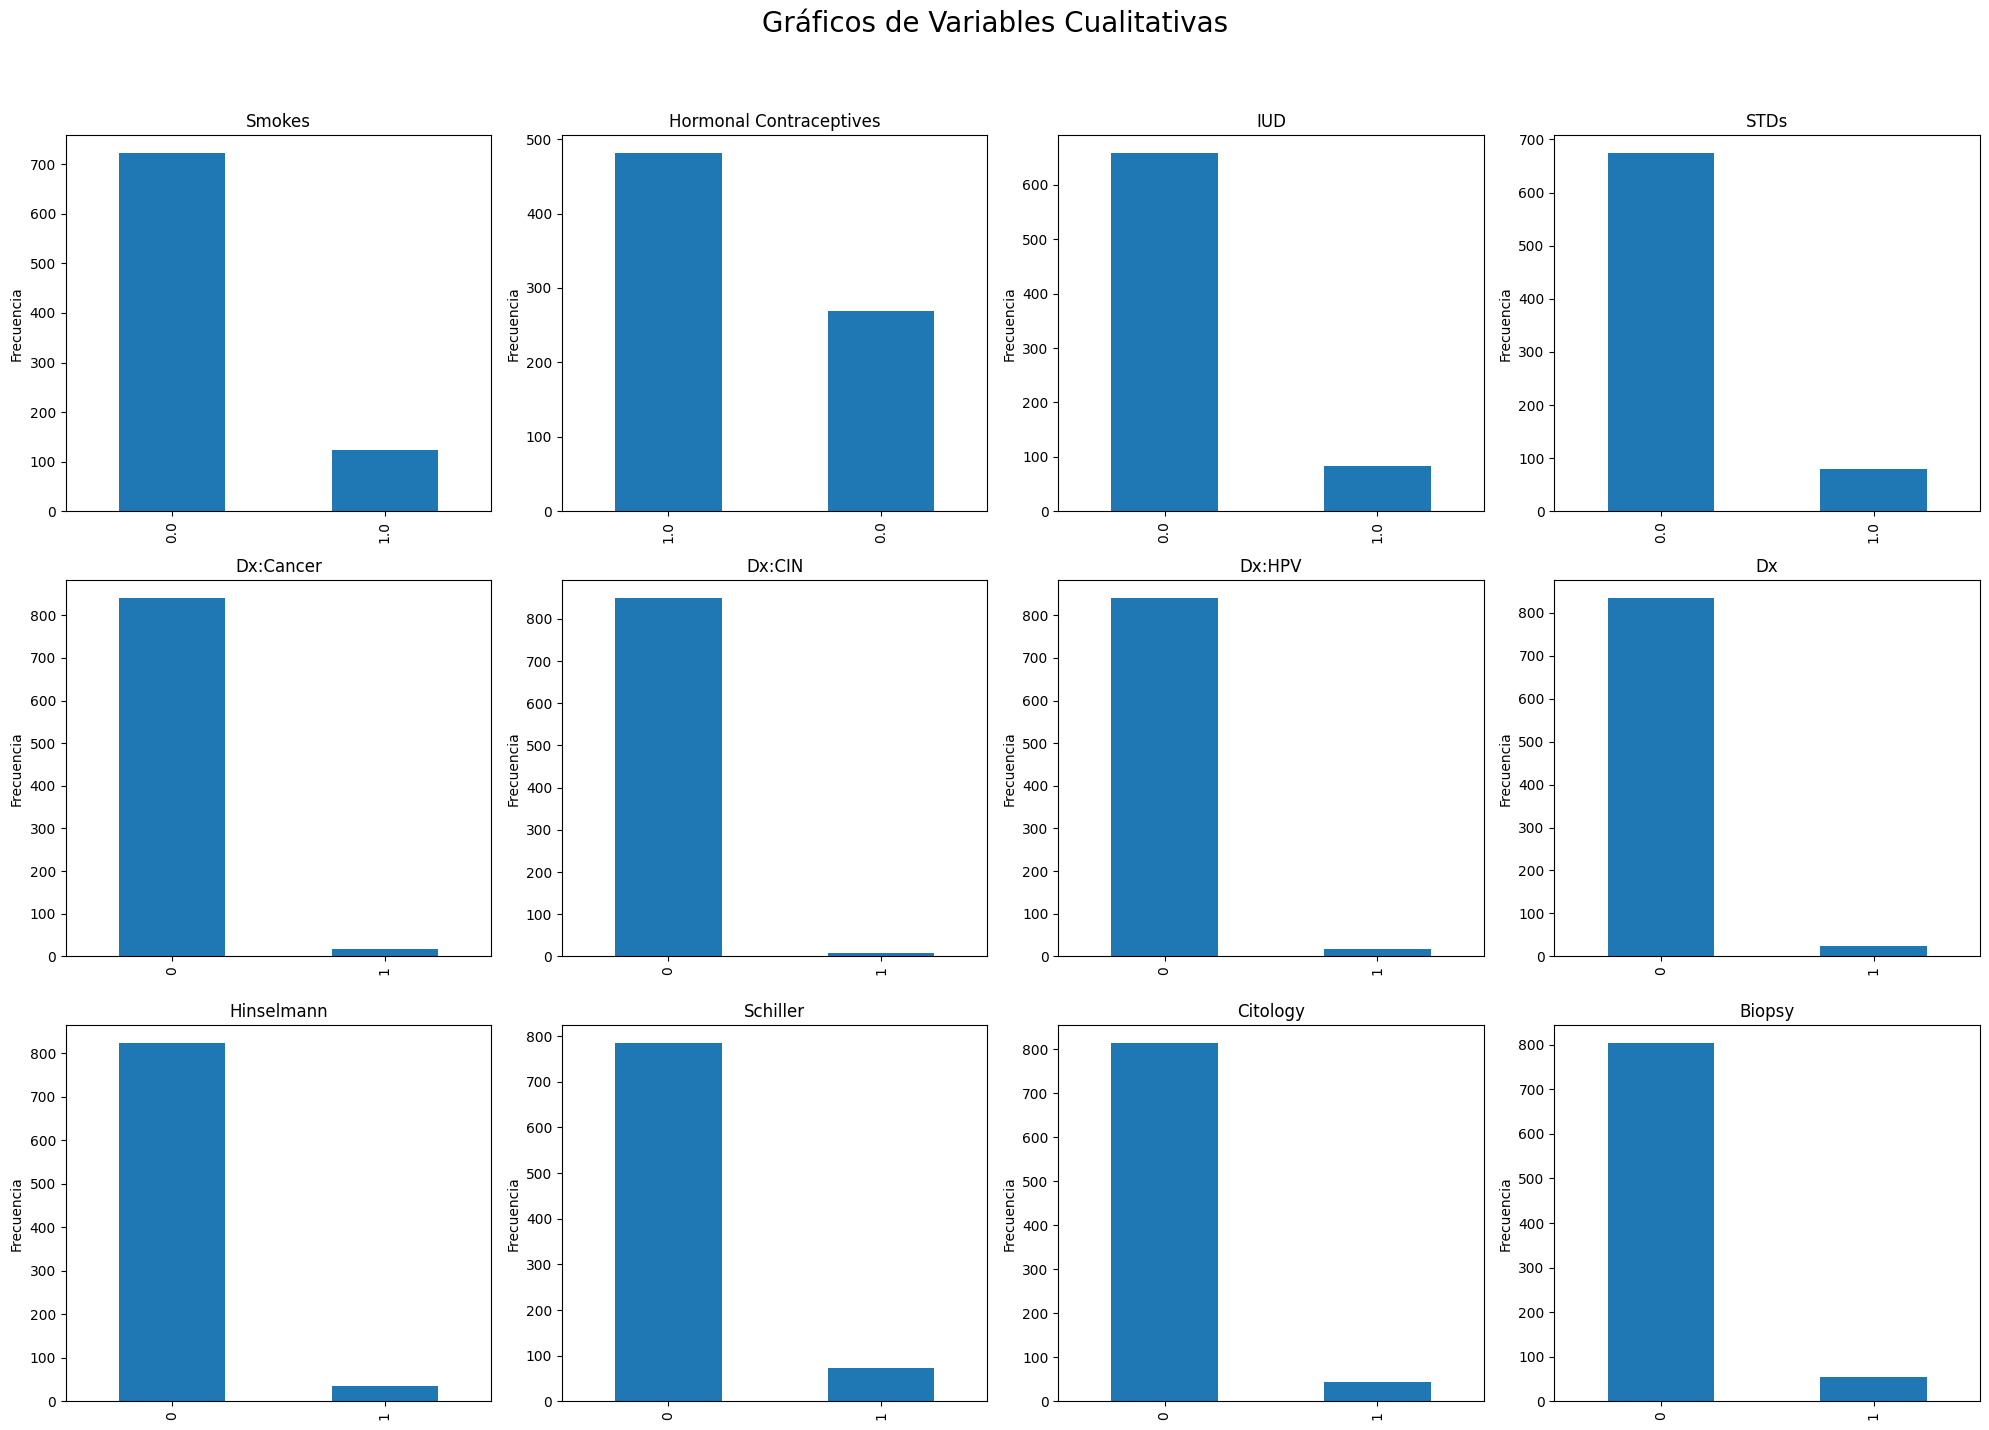

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = 'risk_factors_cervical_cancer.csv'
data = pd.read_csv(file_path)

data = data.replace('?', pd.NA)
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = pd.to_numeric(data[col], errors='coerce')


qualitative_vars = [
    'Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'Dx:Cancer', 'Dx:CIN',
    'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy'
]

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
fig.suptitle('Gráficos de Variables Cualitativas', fontsize=20)

for ax, var in zip(axes.flatten(), qualitative_vars):
    freq_table = data[var].value_counts()
    freq_table.plot(kind='bar', ax=ax)
    ax.set_title(var)
    ax.set_ylabel('Frecuencia')
    ax.set_xlabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Determine el comportamiento a seguir con los valores faltantes. Explique si necesita remover alguna
variable por la cantidad de valores faltantes que tiene. ¿Es factible eliminar todos los valores faltantes
de todas las variables?

6.

                                    Cantidad de Faltantes  Porcentaje
STDs: Time since last diagnosis                       787   91.724942
STDs: Time since first diagnosis                      787   91.724942
IUD                                                   117   13.636364
IUD (years)                                           117   13.636364
Hormonal Contraceptives                               108   12.587413
Hormonal Contraceptives (years)                       108   12.587413
STDs:pelvic inflammatory disease                      105   12.237762
STDs:vulvo-perineal condylomatosis                    105   12.237762
STDs:HPV                                              105   12.237762
STDs:Hepatitis B                                      105   12.237762
STDs:HIV                                              105   12.237762
STDs:AIDS                                             105   12.237762
STDs:molluscum contagiosum                            105   12.237762
STDs:genital herpes 

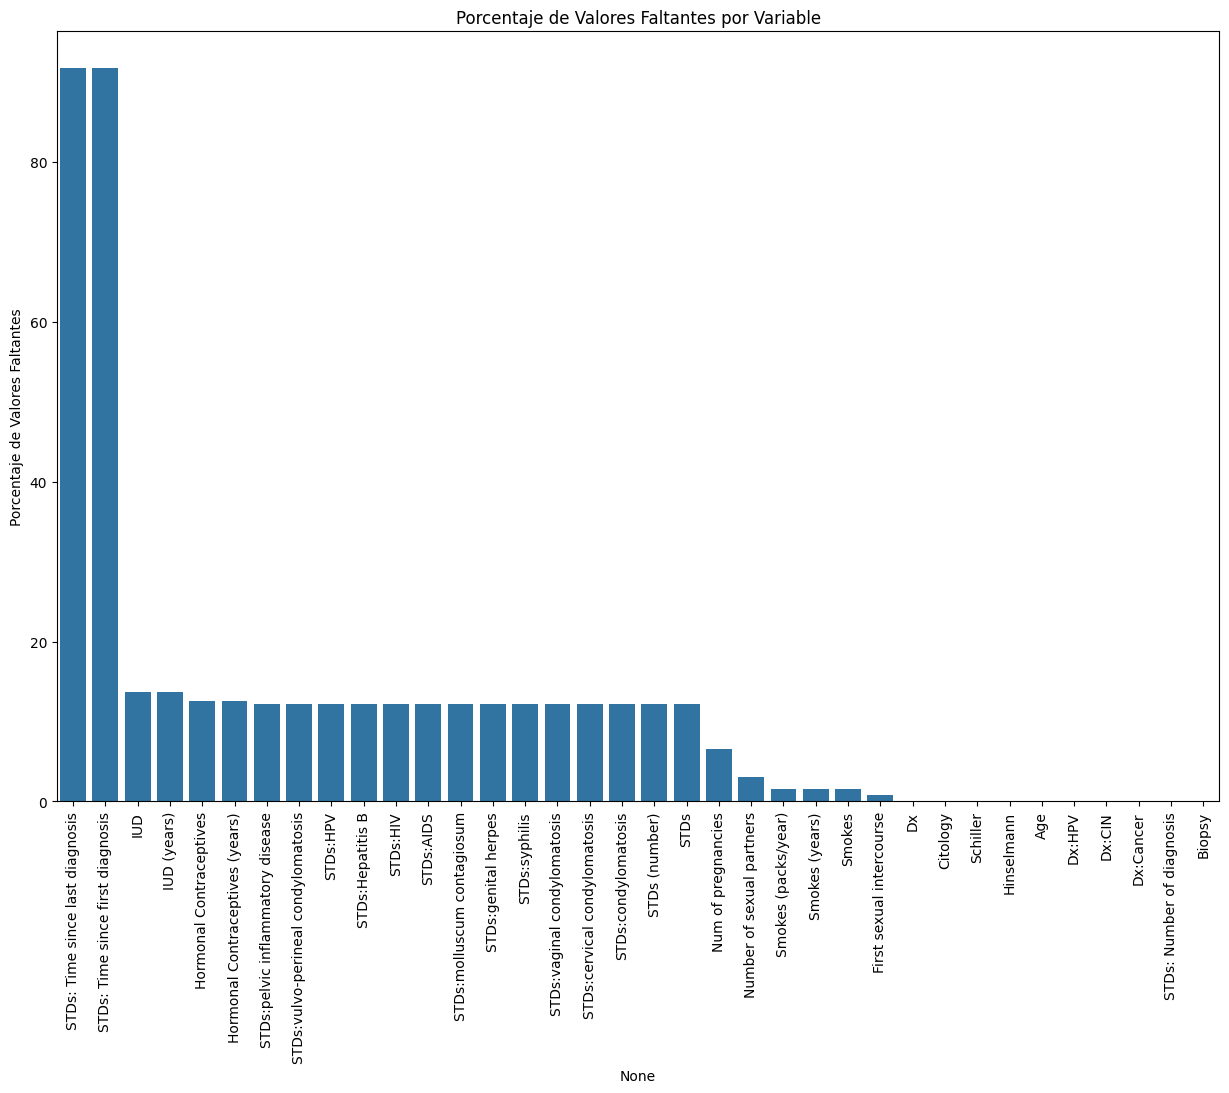

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = 'risk_factors_cervical_cancer.csv'
data = pd.read_csv(file_path)


data = data.replace('?', pd.NA)

missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100


missing_data = pd.DataFrame({'Cantidad de Faltantes': missing_values, 'Porcentaje': missing_percentage})
missing_data = missing_data.sort_values(by='Porcentaje', ascending=False)


print(missing_data)

plt.figure(figsize=(15, 10))
sns.barplot(x=missing_data.index, y=missing_data['Porcentaje'])
plt.xticks(rotation=90)
plt.ylabel('Porcentaje de Valores Faltantes')
plt.title('Porcentaje de Valores Faltantes por Variable')
plt.show()


In [25]:
# Umbral para eliminar variables con muchos valores faltantes
threshold = 40

# Eliminar variables con muchos valores faltantes
variables_a_eliminar = missing_data[missing_data['Porcentaje'] > threshold].index
data_cleaned = data.drop(columns=variables_a_eliminar)

# Imputación de valores faltantes en variables restantes
for col in data_cleaned.columns:
    if data_cleaned[col].dtype == 'object':
        # Variables categóricas: rellenar con la moda
        data_cleaned[col].fillna(data_cleaned[col].mode()[0], inplace=True)
    else:
        # Variables numéricas: rellenar con la mediana
        data_cleaned[col].fillna(data_cleaned[col].median(), inplace=True)

# Verificar valores faltantes después de la limpieza
print(data_cleaned.isnull().sum())


Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


7.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


data = data.replace('?', pd.NA)
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = pd.to_numeric(data[col], errors='coerce')

qualitative_vars = [
    'Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'Dx:Cancer', 'Dx:CIN',
    'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy'
]

quantitative_vars = [
    'Age', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)',
    'IUD (years)', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
    'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies',
    'STDs (number)', 'STDs: Number of diagnosis'
]


for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].median(), inplace=True)

# Transformación One-Hot Encoding de variables categóricas
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_qualitative = encoder.fit_transform(data[qualitative_vars])

# Crear DataFrame con variables codificadas
encoded_qualitative_df = pd.DataFrame(encoded_qualitative, columns=encoder.get_feature_names_out(qualitative_vars))

# Concatenar variables cuantitativas y categóricas codificadas
data_for_pca = pd.concat([data[quantitative_vars], encoded_qualitative_df], axis=1)

# Normalizar los datos antes de aplicar PCA
scaler = StandardScaler()
data_for_pca_scaled = scaler.fit_transform(data_for_pca)

# Aplicar PCA
pca = PCA(n_components=10) 
principal_components = pca.fit_transform(data_for_pca_scaled)

# Crear DataFrame con los componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(10)])

# Visualizar la varianza explicada por cada componente principal
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Varianza explicada individual')
plt.step(range(1, 11), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Varianza explicada acumulativa')
plt.ylabel('Ratio de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


ValueError: Shape of passed values is (858, 1), indices imply (858, 12)

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


data = data.replace('?', pd.NA)
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Identificar variables numéricas
numeric_vars = [
    'Age', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)',
    'IUD (years)', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
    'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies',
    'STDs (number)', 'STDs: Number of diagnosis'
]


for col in numeric_vars:
    data[col].fillna(data[col].median(), inplace=True)

# Calcular KMO
kmo_all, kmo_model = calculate_kmo(data[numeric_vars])
print(f'Índice KMO: {kmo_model}')

# Calcular prueba de esfericidad de Bartlett
chi_square_value, p_value = calculate_bartlett_sphericity(data[numeric_vars])
print(f'Chi-cuadrado: {chi_square_value}, p-valor: {p_value}')

# Normalizar los datos antes de aplicar PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numeric_vars])

# Aplicar PCA
pca = PCA(n_components=10)
principal_components = pca.fit_transform(data_scaled)


pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(10)])




Índice KMO: 0.539987765331393
Chi-cuadrado: 4751.429298561839, p-valor: 0.0


Índice KMO: 0.54
Interpretación: Un índice KMO superior a 0.6 generalmente se considera adecuado para realizar PCA. En este caso, el índice KMO es ligeramente inferior a 0.6, lo que sugiere que las variables pueden no ser completamente adecuadas para PCA. Sin embargo, este valor cercano a 0.6 indica que podría ser factible continuar con el análisis, aunque con precaución.


Chi-cuadrado: 4751.43
p-valor: 0.0
Interpretación: El p-valor es significativamente menor a 0.05, lo que indica que hay suficientes correlaciones significativas entre las variables para justificar el uso de PCA.


Estudie si es conveniente hacer un Análisis de Componentes Principales. Recuerde que puede usar el 
índice KMO y el test de esfericidad de Bartlett. Haga un análisis de componentes principales con las 
variables numéricas, discuta los resultados e interprete los componentes. 

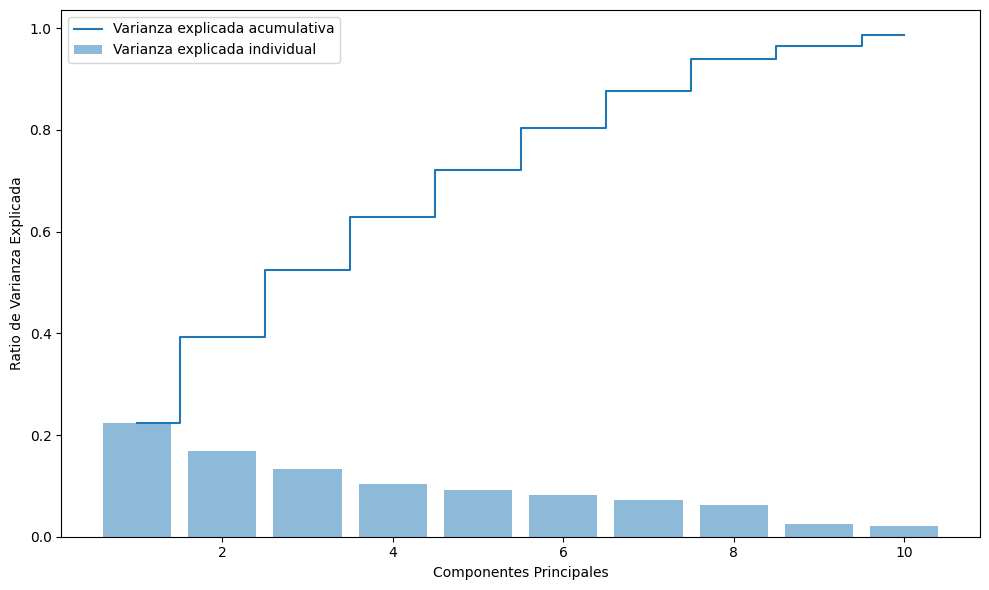

                                       PC1       PC2       PC3       PC4  \
Age                               0.199113  0.451292 -0.396313  0.160165   
Smokes (years)                    0.228237  0.413933  0.431182 -0.009663   
Smokes (packs/year)               0.181283  0.393945  0.474387 -0.052775   
Hormonal Contraceptives (years)   0.099323  0.248183 -0.259127  0.011780   
IUD (years)                       0.077367  0.157390 -0.166837  0.118867   
STDs: Time since first diagnosis  0.463347 -0.150784 -0.143449 -0.498207   
STDs: Time since last diagnosis   0.483052 -0.149246 -0.137254 -0.458652   
Number of sexual partners         0.110053  0.162734  0.257814 -0.059090   
First sexual intercourse          0.025998  0.070328 -0.388055  0.192340   
Num of pregnancies                0.176025  0.389564 -0.241628  0.116281   
STDs (number)                     0.417793 -0.272876  0.106603  0.498194   
STDs: Number of diagnosis         0.439539 -0.284211  0.103797  0.443197   

           

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



data = data.replace('?', pd.NA)
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Identificar variables numéricas
numeric_vars = [
    'Age', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)',
    'IUD (years)', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
    'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies',
    'STDs (number)', 'STDs: Number of diagnosis'
]


for col in numeric_vars:
    data[col].fillna(data[col].median(), inplace=True)

# Normalizar los datos antes de aplicar PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numeric_vars])

# Aplicar PCA
pca = PCA(n_components=10)
principal_components = pca.fit_transform(data_scaled)


pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(10)])

# Visualizar la varianza explicada por cada componente principal
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Varianza explicada individual')
plt.step(range(1, 11), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Varianza explicada acumulativa')
plt.ylabel('Ratio de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Mostrar la carga de los componentes principales
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(10)], index=numeric_vars)
print(loadings)


### Interpretación de los Componentes Principales

#### Primer Componente Principal (PC1):
- **Cargas Altas**: 
  - `STDs: Time since first diagnosis` (0.463347)
  - `STDs: Time since last diagnosis` (0.483052)
  - `STDs (number)` (0.417793)
  - `STDs: Number of diagnosis` (0.439539)
- **Interpretación**: Este componente está relacionado principalmente con el historial de enfermedades de transmisión sexual (ETDs).

#### Segundo Componente Principal (PC2):
- **Cargas Altas**: 
  - `Age` (0.451292)
  - `Smokes (years)` (0.413933)
  - `Smokes (packs/year)` (0.393945)
  - `Num of pregnancies` (0.389564)
- **Interpretación**: Este componente captura información relacionada con la edad y los hábitos de fumar de los pacientes, así como el número de embarazos.

#### Tercer Componente Principal (PC3):
- **Cargas Altas**: 
  - `Smokes (years)` (0.431182)
  - `Smokes (packs/year)` (0.474387)
  - `Age` (-0.396313)
- **Interpretación**: Este componente representa la cantidad de años y la intensidad del hábito de fumar, con una relación inversa con la edad.

#### Cuarto Componente Principal (PC4):
- **Cargas Altas**: 
  - `STDs: Time since first diagnosis` (-0.498207)
  - `STDs: Time since last diagnosis` (-0.458652)
  - `STDs (number)` (0.498194)
  - `STDs: Number of diagnosis` (0.443197)
- **Interpretación**: Similar a PC1, este componente también está relacionado con el historial de ETDs, pero con una perspectiva diferente en términos de tiempo desde los diagnósticos.

#### Quinto Componente Principal (PC5):
- **Cargas Altas**: 
  - `First sexual intercourse` (-0.688855)
  - `Number of sexual partners` (0.354985)
  - `Num of pregnancies` (0.355290)
  - `IUD (years)` (0.331879)
- **Interpretación**: Este componente está relacionado con la historia sexual y reproductiva de los pacientes.

#### Sexto Componente Principal (PC6):
- **Cargas Altas**: 
  - `Hormonal Contraceptives (years)` (-0.576465)
  - `IUD (years)` (0.780623)
- **Interpretación**: Este componente captura el uso de métodos anticonceptivos.

#### Séptimo Componente Principal (PC7):
- **Cargas Altas**: 
  - `Number of sexual partners` (0.827011)
  - `First sexual intercourse` (0.337346)
- **Interpretación**: Este componente está relacionado con el comportamiento sexual de los pacientes.

#### Octavo Componente Principal (PC8):
- **Cargas Altas**: 
  - `Num of pregnancies` (0.603079)
- **Interpretación**: Este componente está principalmente relacionado con el número de embarazos.

#### Noveno Componente Principal (PC9):
- **Cargas Altas**: 
  - `Age` (0.648858)
- **Interpretación**: Este componente está relacionado principalmente con la edad de los pacientes.

#### Décimo Componente Principal (PC10):
- **Cargas Altas**: 
  - `Smokes (years)` (-0.671504)
  - `Smokes (packs/year)` (0.619320)
- **Interpretación**: Este componente representa una combinación adicional de la cantidad de años y la intensidad del hábito de fumar.



## 9 creación de reglas de asociacion


In [7]:
bools = ['Smokes','Hormonal Contraceptives','STDs:condylomatosis','STDs:cervical condylomatosis','STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis','STDs:syphilis','STDs:pelvic inflammatory disease','STDs:genital herpes','STDs:molluscum contagiosum','STDs:AIDS','STDs:HIV','STDs:Hepatitis B','STDs:HPV','Dx:Cancer','Dx:CIN','Dx:HPV']
file_path = 'risk_factors_cervical_cancer.csv'
data = pd.read_csv(file_path)
data = data.replace('?', pd.NA)
dfApriori = data[bools].dropna()
dfApriori = dfApriori.astype(float)

#importar apriori para el calculo de reglas de asociacion

from mlxtend.frequent_patterns import apriori, association_rules

In [19]:
#al menos 2% de soporte entre valores
ASSOCIATIONS = apriori(dfApriori,min_support=0.02, use_colnames = True, verbose = 1)
ASSOCIATIONS


Processing 33 combinations | Sampling itemset size 3


C:\Users\inmar\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.143443,(Smokes)
1,0.640710,(Hormonal Contraceptives)
2,0.054645,(STDs:condylomatosis)
3,0.053279,(STDs:vulvo-perineal condylomatosis)
4,0.020492,(STDs:syphilis)
5,0.020492,(STDs:HIV)
6,0.023224,(Dx:Cancer)
7,0.021858,(Dx:HPV)
8,0.091530,"(Smokes, Hormonal Contraceptives)"
9,0.035519,"(STDs:condylomatosis, Hormonal Contraceptives)"


In [20]:
# Function to map indices back to column names
ASSOCIATIONS_RULES = association_rules(ASSOCIATIONS, metric = "confidence", min_threshold = 0.6)
ASSOCIATIONS_RULES[['antecedents','consequents','support','confidence','lift']]

,antecedents,consequents,support,confidence,lift
0,(Smokes),(Hormonal Contraceptives),0.091530,0.638095,0.995918
1,(STDs:condylomatosis),(Hormonal Contraceptives),0.035519,0.650000,1.014499
2,(STDs:vulvo-perineal condylomatosis),(Hormonal Contraceptives),0.034153,0.641026,1.000492
3,(STDs:condylomatosis),(STDs:vulvo-perineal condylomatosis),0.053279,0.975000,18.300000
4,(STDs:vulvo-perineal condylomatosis),(STDs:condylomatosis),0.053279,1.000000,18.300000
5,(Dx:Cancer),(Dx:HPV),0.020492,0.882353,40.367647
6,(Dx:HPV),(Dx:Cancer),0.020492,0.937500,40.367647
7,"(STDs:condylomatosis, STDs:vulvo-perineal cond...",(Hormonal Contraceptives),0.034153,0.641026,1.000492
8,"(STDs:condylomatosis, Hormonal Contraceptives)",(STDs:vulvo-perineal condylomatosis),0.034153,0.961538,18.047337
9,"(STDs:vulvo-perineal condylomatosis, Hormonal ...",(STDs:condylomatosis),0.034153,1.000000,18.300000


In [23]:
#al menos 10% de soporte entre valores
ASSOCIATIONS_10 = apriori(dfApriori,min_support=0.10, use_colnames = True, verbose = 1)
ASSOCIATIONS_10


Processing 2 combinations | Sampling itemset size 2


C:\Users\inmar\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.143443,(Smokes)
1,0.640710,(Hormonal Contraceptives)


In [24]:
# Function to map indices back to column names 60% de confianza
ASSOCIATIONS_RULES_10 = association_rules(ASSOCIATIONS, metric = "confidence", min_threshold = 0.6)
ASSOCIATIONS_RULES_10[['antecedents','consequents','support','confidence','lift']]

,antecedents,consequents,support,confidence,lift


In [25]:
#al menos 20% de soporte entre valores
ASSOCIATIONS = apriori(dfApriori,min_support=0.20, use_colnames = True, verbose = 1)
ASSOCIATIONS


C:\Users\inmar\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.64071,(Hormonal Contraceptives)


In [26]:
# Function to map indices back to column names 60% de confianza
ASSOCIATIONS_RULES = association_rules(ASSOCIATIONS, metric = "confidence", min_threshold = 0.6)
ASSOCIATIONS_RULES[['antecedents','consequents','support','confidence','lift']]

,antecedents,consequents,support,confidence,lift


En el resultado de las reglas de asociacion solamente se puede obtener reglas con valores de soporte minimo 0.03 en adelante con dos columnas, de lo contrario solo son de 1, es decir esa columna con ella misma. Por lo que al usar un soporte del 2%, se obtiene que si usa Fuma, tiene contraceptivos hormonales, sin embargo una confiancia del 63% y un soporte del 9%. 
Cabe recalcar que ninguna combinación de antecedente y consecuentes tiene un sporte si quiera del 10% indicando que son eventos poco probables.
Sin embargo, se tiene una confianza del 100% que si tiene vulvo-perineal condylomatosis tendrá STDs:condylomatosis , pese a que el soporte es del solo 5%, siendo un valor extraordinario,
pues si bien es poco probable que suceda, indicado por el soporte, está garantizado que por uno está el otro.

# Conclusiones y hallazgos

- La mayoría de las pacientes se encuentra entre los 20 y 32 años, con un pico alrededor de los 25 años. En donde la mayoría tuvo su primer encuentro sexual entre los 15 y 18 años.
- Predomina entre 1 y 3 parejas sexuales, con casos extremos de hasta 28 parejas. Además de que la mayoría de voluntarios tiene entre 1 y 3 , con caso extremo de 11, viendo que suele      estar relacionada la cantidad de parejas con los embarazos. 
- Aproximadamente la mitad de las pacientes usa anticonceptivos hormonales.
